# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,405,88,40,73,173,68,7,150,44,19,137,174,341,151,69,2,20,196,200
1,340,89,40,72,155,63,7,146,45,19,135,175,321,145,72,4,10,192,196
2,25,85,45,80,154,64,9,147,45,19,148,169,324,174,71,1,4,188,199
3,347,88,44,77,167,59,6,151,44,19,145,175,343,177,64,9,12,202,208
4,319,102,51,92,194,60,6,220,30,25,162,247,731,209,80,7,7,188,186
5,616,92,42,69,153,58,8,140,48,18,138,165,290,151,64,10,21,199,206
6,823,105,54,105,213,67,10,200,33,23,163,214,597,214,68,10,20,190,198
7,431,99,47,91,226,74,5,202,32,23,148,234,629,186,79,4,11,192,191
8,722,94,45,85,163,68,10,157,44,20,156,170,357,176,73,17,11,187,195
9,618,98,39,68,136,56,8,131,52,18,144,159,251,134,72,4,10,186,187


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.861566,93.666667,44.836066,82.187614,168.413479,61.486339,8.442623,168.958106,40.943534,20.584699,148.071038,188.677596,440.652095,174.681239,72.508197,6.409836,12.653916,188.892532,195.517304
std,245.851268,7.920683,6.183219,15.870925,33.664270,8.032456,4.039821,33.717104,7.818335,2.639990,14.534519,32.002222,179.694563,32.752534,7.349116,5.004886,8.976881,6.108905,7.496360
min,1.000000,77.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,177.000000,181.000000
25%,219.000000,87.000000,40.000000,70.000000,141.000000,56.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,319.000000,148.000000,67.000000,2.000000,5.000000,185.000000,190.000000
50%,433.000000,93.000000,44.000000,80.000000,166.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,178.000000,361.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,633.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,598.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,49.000000,265.000000,61.000000,29.000000,182.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
### YOUR CODE HERE



X_train_pd.corr()

#нулевой столбец содержит порядковый номер и соответственно не несет  информации
#и как мы можем видеть из матрицы корреляции часть признаков имеют высокую корреляцию потому мы их можем удалить 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.071852,0.040881,0.050405,0.013284,-0.064864,-0.028016,0.057209,-0.051723,0.051121,0.038701,0.033428,0.054417,0.028928,-0.055020,-0.006533,0.052965,0.014310,0.019526
1,0.071852,1.000000,0.691954,0.796584,0.673584,0.086648,0.214999,0.809943,-0.784522,0.811591,0.679214,0.765456,0.815026,0.578676,-0.209379,0.173496,0.172405,0.257895,0.335134
2,0.040881,0.691954,1.000000,0.797326,0.607902,0.132224,0.290450,0.863621,-0.833888,0.858951,0.964721,0.813444,0.856183,0.932739,0.091790,0.094754,0.029386,-0.141872,0.021596
3,0.050405,0.796584,0.797326,1.000000,0.764205,0.168234,0.335571,0.905866,-0.914778,0.893561,0.776618,0.864943,0.887601,0.694968,-0.196056,0.057543,0.283994,0.123169,0.317675
4,0.013284,0.673584,0.607902,0.764205,1.000000,0.689618,0.502686,0.712715,-0.770928,0.686047,0.561989,0.775462,0.698205,0.517392,-0.157390,-0.000737,0.196645,0.357679,0.457251
5,-0.064864,0.086648,0.132224,0.168234,0.689618,1.000000,0.630669,0.086165,-0.171407,0.060056,0.120073,0.249882,0.069716,0.097705,0.100445,-0.087126,-0.022083,0.264696,0.306566
6,-0.028016,0.214999,0.290450,0.335571,0.502686,0.630669,1.000000,0.203489,-0.219852,0.198122,0.371812,0.338593,0.177698,0.201087,0.209809,-0.000595,0.076892,0.000896,0.203746
7,0.057209,0.809943,0.863621,0.905866,0.712715,0.086165,0.203489,1.000000,-0.973467,0.992403,0.814208,0.951574,0.996308,0.803872,0.020529,0.031170,0.247731,-0.042760,0.083863
8,-0.051723,-0.784522,-0.833888,-0.914778,-0.770928,-0.171407,-0.219852,-0.973467,1.000000,-0.951195,-0.780664,-0.935601,-0.956100,-0.769725,0.056365,-0.004910,-0.223050,-0.058164,-0.179339
9,0.051121,0.811591,0.858951,0.893561,0.686047,0.060056,0.198122,0.992403,-0.951195,1.000000,0.813713,0.939402,0.992818,0.799841,0.032813,0.040941,0.247640,-0.066363,0.061774


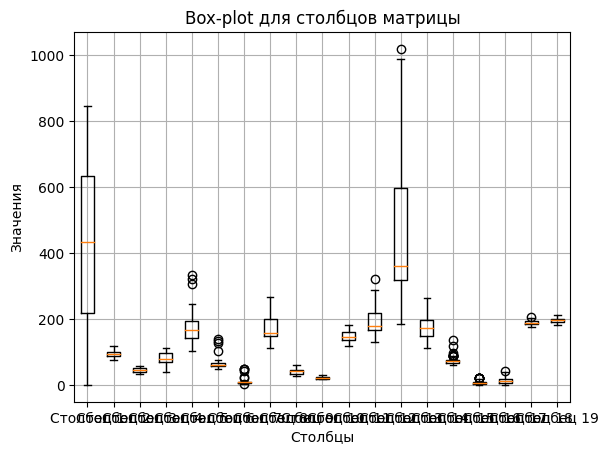

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(X_train)
plt.xlabel('Столбцы')
plt.ylabel('Значения')
plt.title('Box-plot для столбцов матрицы')
plt.xticks(np.arange(1, X_train.shape[1] + 1), [f'Столбец {i+1}' for i in range(X_train.shape[1])])
plt.grid(True)
plt.show()

In [8]:
# выбросы присутствуют в данных, для данного кейса не удаляем. ибо нет гиганскийх выбивающихся за пределы разумного
#путем экспериментального удаления признаков лучший набор получен  при следующем наборе
columns__del=[0,3, 7, 8,9,10,11,12, 13,14,18]

#удалим коллениарные столбцы из  train и test
X_train = np.delete(X_train, columns__del, 1)
X_test = np.delete(X_test, columns__del, 1)

X_train_pd.drop(columns=columns__del).corr()


,1,2,4,5,6,15,16,17
1,1.000000,0.691954,0.673584,0.086648,0.214999,0.173496,0.172405,0.257895
2,0.691954,1.000000,0.607902,0.132224,0.290450,0.094754,0.029386,-0.141872
4,0.673584,0.607902,1.000000,0.689618,0.502686,-0.000737,0.196645,0.357679
5,0.086648,0.132224,0.689618,1.000000,0.630669,-0.087126,-0.022083,0.264696
6,0.214999,0.290450,0.502686,0.630669,1.000000,-0.000595,0.076892,0.000896
15,0.173496,0.094754,-0.000737,-0.087126,-0.000595,1.000000,-0.079329,0.082435
16,0.172405,0.029386,0.196645,-0.022083,0.076892,-0.079329,1.000000,0.071929
17,0.257895,-0.141872,0.357679,0.264696,0.000896,0.082435,0.071929,1.000000


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

F1 Score: 0.6060741083716363
Accuracy: 0.6161616161616161
ROC AUC Score: 0.8307538104733759


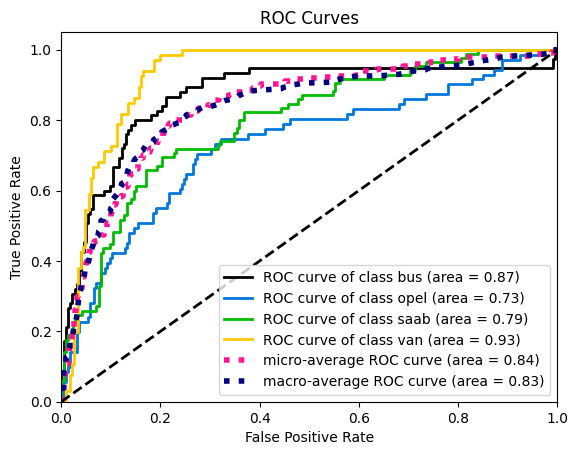

In [9]:
### YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt


# Define hyperparameters grid
param_grid = {
    'C': [ 0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],               
}


log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1500)# число итераций увеличено, т.к. было завершение процесса не по достижении точности, а по числу итераций

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)


best_params_log_reg = grid_search.best_params_

# используем полученные гипер параметры 
log_reg_best = LogisticRegression(**best_params_log_reg, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
log_reg_best.fit(X_train, y_train)


y_pred = log_reg_best.predict(X_test)
y_pred_proba = log_reg_best.predict_proba(X_test)

# рассчитаем метрики
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  

print("F1 Score:", f1)
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

# построим ROC кривую
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

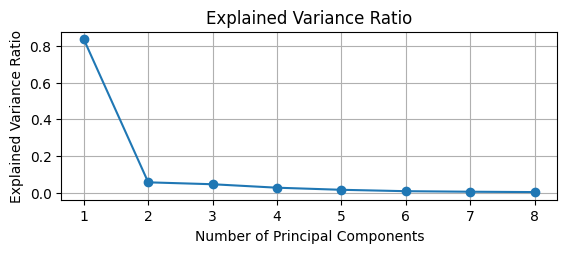

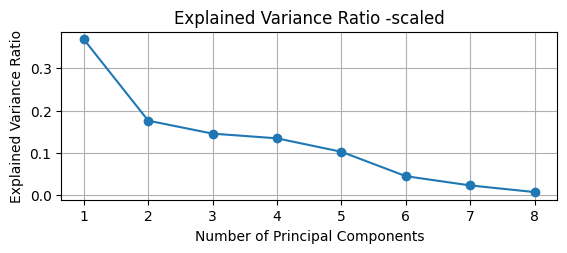

In [11]:
### YOUR CODE HERE


from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler





#если единицы измерения признаков сильно различаются своими порядками, крайне рекомендуется стандартизировать их. 


plt.subplot(2, 1, 1)
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


plt.subplot(2, 1, 2)
scaler = StandardScaler()
X_train_Scale = scaler.fit_transform(X_train)
pca_scaled  = PCA()
X_train_pca_scaled = pca_scaled.fit_transform(X_train_Scale)
plt.plot(range(1, len(pca_scaled.explained_variance_ratio_) + 1), pca_scaled.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio -scaled')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca_scaled.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

# по методу локтя можно оставить 2 признака на не скалированных данных, но  для скаллированных данных надо оставить все данные. 

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [12]:
### YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# изучив полученные выше данные 
# при использовании StandardScaler - по методу локтя нам нужно 7 компонент
# а без использования,  достаточно 2х компонент- признаков, и при более четкой границе.
# но так так у нас линейные моделит правильно скалированть данные. 
# к тому же при проверке на следующей ячейке на не скаллированных данных  мы имеем точность близкую с случаной-наивной

std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
n_components = 7  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Conve

Best parameters: {'logistic__C': 100, 'logistic__penalty': 'l1', 'pca__n_components': 7}
Accuracy: 0.5622895622895623
F1 score: 0.5505844286504192


C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: Conve

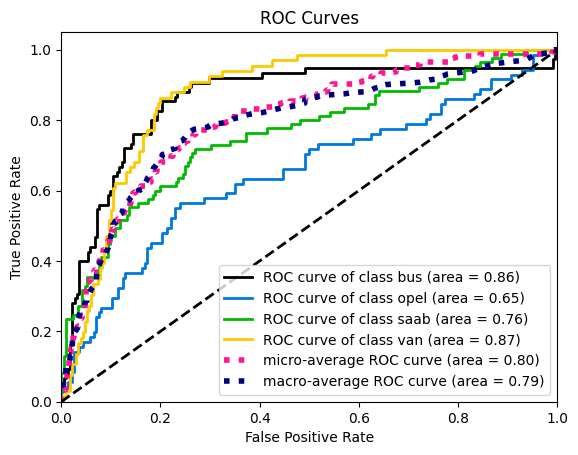

In [13]:
### YOUR CODE HERE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import scikitplot as skplt

# сделаем подбор pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),    
    ('pca', PCA()),
    ('logistic', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3))
])


param_grid = {
    'pca__n_components': [2, 3,4, 5 , 6, 7  ],
    'logistic__C': [ 0.001, 0.01, 0.1, 1, 10, 100],  
    'logistic__penalty': ['l1', 'l2'],      
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Best parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("F1 score:", f1)


log_reg_best_parm = grid_search.best_params_

predicted_proba = best_estimator.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_proba)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best parameters: {'max_depth': 12}
Best cross-validation F1 score: 0.6940665210456343
Test F1 score: 0.6627369036175839
Test accuracy: 0.6599326599326599


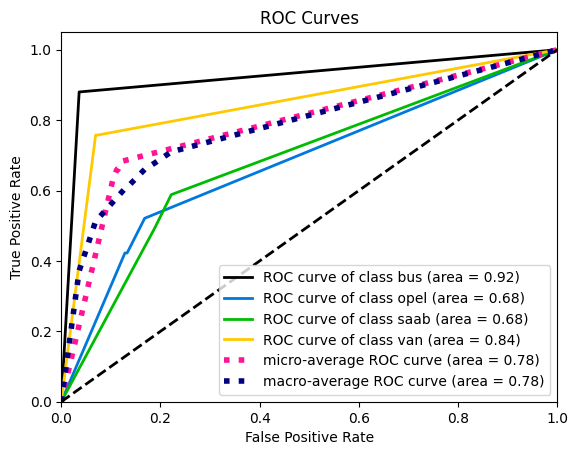

In [14]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn import metrics


param_grid = {
    'max_depth': np.arange(2, 101, 5)
}


decision_tree = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1 score:", grid_search.best_score_)


y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)

best_param_dec_tree = grid_search.best_params_


f1_score = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test F1 score:", f1_score)
print("Test accuracy:", accuracy)
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\rvv19\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pac

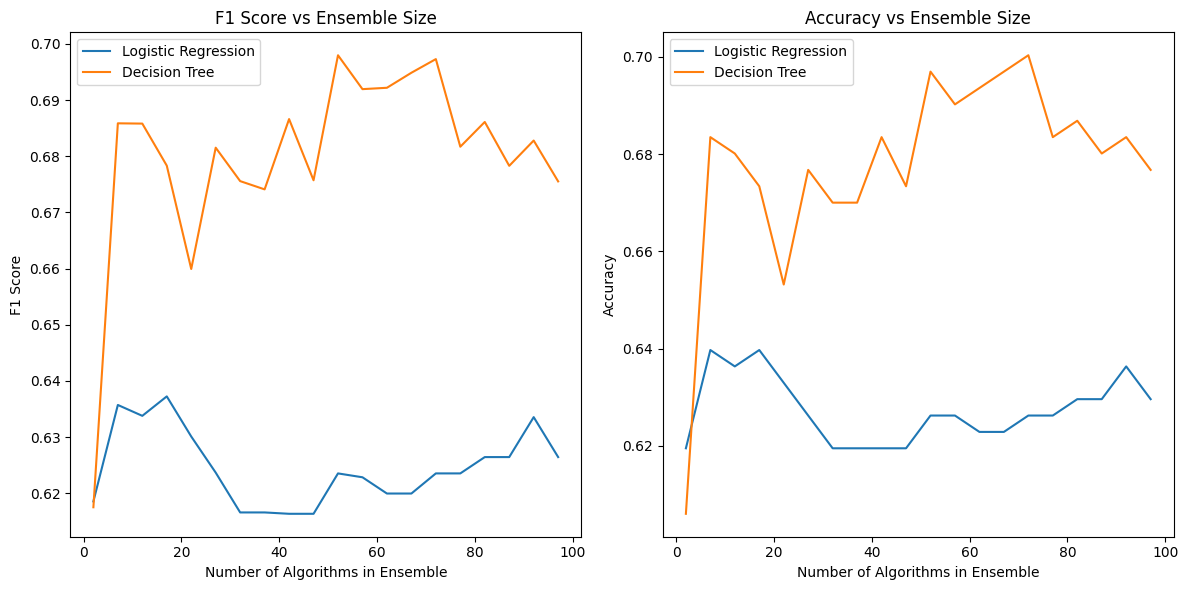

In [15]:
# YOUR CODE HERE

from sklearn.ensemble import BaggingClassifier
import numpy as np
import matplotlib.pyplot as plt


ensemble_sizes = np.arange(2, 101, 5)


f1_scores_lr = []
accuracy_lr = []
f1_scores_dt = []
accuracy_dt = []


for N in ensemble_sizes:
    

    logistic_regression = LogisticRegression(**best_params_log_reg, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
    bagging_lr = BaggingClassifier(base_estimator=logistic_regression, n_estimators=N, random_state=42)
    bagging_lr.fit(X_train, y_train)
    y_pred_lr = bagging_lr.predict(X_test)
    f1_lr = metrics.f1_score(y_test, y_pred_lr, average='macro')
    acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
    f1_scores_lr.append(f1_lr)
    accuracy_lr.append(acc_lr)


    decision_tree = DecisionTreeClassifier(**best_param_dec_tree, random_state=42)
    bagging_dt = BaggingClassifier(base_estimator=decision_tree, n_estimators=N, random_state=42)
    bagging_dt.fit(X_train, y_train)
    y_pred_dt = bagging_dt.predict(X_test)
    f1_dt = metrics.f1_score(y_test, y_pred_dt, average='macro')
    acc_dt = metrics.accuracy_score(y_test, y_pred_dt)
    f1_scores_dt.append(f1_dt)
    accuracy_dt.append(acc_dt)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_lr, label='Logistic Regression')
plt.plot(ensemble_sizes, f1_scores_dt, label='Decision Tree')
plt.xlabel('Number of Algorithms in Ensemble')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Ensemble Size')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_lr, label='Logistic Regression')
plt.plot(ensemble_sizes, accuracy_dt, label='Decision Tree')
plt.xlabel('Number of Algorithms in Ensemble')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Ensemble Size')
plt.legend()

plt.tight_layout()
plt.show()


# оптимальное число аглогитмов в находится в районе 30, этого количества идет резкий рост качества модели после идут колебания с локальными минимумами но колоссального прироста точности не идет.
# применние полученныйх в 2.5 параметров возможно, но также будет оправдано использование менее глубоких деревьев. что снизит требования к аппаратной части и  повысит скорость вычислений


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

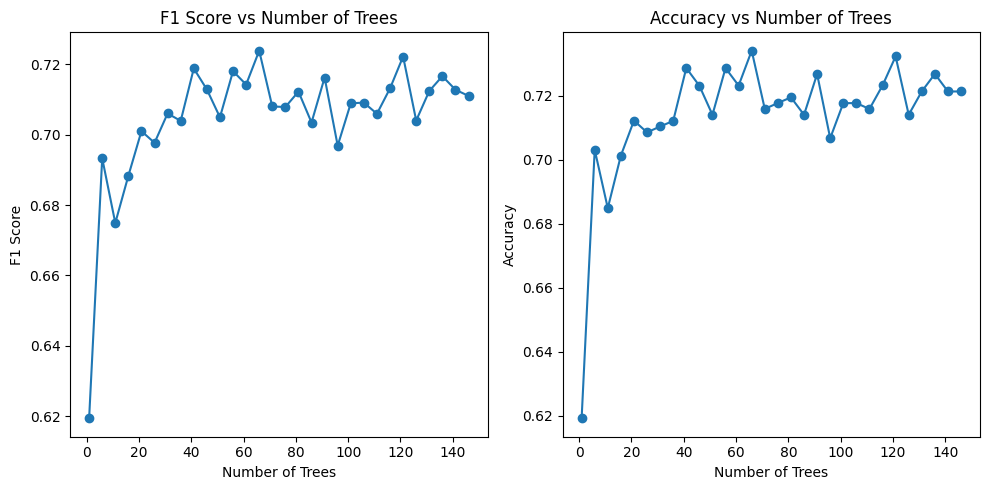

Best Parameters: {'n_estimators': 66}
Best F1 Score: 0.7340617180984154
F1 Score with Optimal Random Forest: 0.6917658805956677
Accuracy with Optimal Random Forest: 0.6902356902356902


In [16]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV


n_estimators = range(1,150,5)
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': n_estimators  # Number of trees in the forest
}

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring = ['accuracy','f1_macro'], refit='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search.best_params_
best_score = grid_search.best_score_

# Train Random Forest with the best parameters
best_rf = RandomForestClassifier(**best_params_rf, random_state= 42 )
best_rf.fit(X_train, y_train)

# Predict on the test set
rf_pred = best_rf.predict(X_test)

# Calculate F1 score and accuracy
f1_rf =  metrics.f1_score(y_test, rf_pred, average='macro')
accuracy_rf = metrics.accuracy_score(y_test, rf_pred)



plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators, grid_search.cv_results_['mean_test_f1_macro'], marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Trees')

plt.subplot(1, 2, 2)
plt.plot(n_estimators, grid_search.cv_results_['mean_test_accuracy'], marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Trees')

plt.tight_layout()
plt.show()

print("Best Parameters:", best_params_rf)
print("Best F1 Score:", best_score)
print("F1 Score with Optimal Random Forest:", f1_rf)
print("Accuracy with Optimal Random Forest:", accuracy_rf)

In [17]:
# на основании подбора получилось оптимально 66 деревьев
# но как видно из графиков резкий прирост качества замедляется на 30. потому более 30 деревьев можно рассматривать как оптимальное решение

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

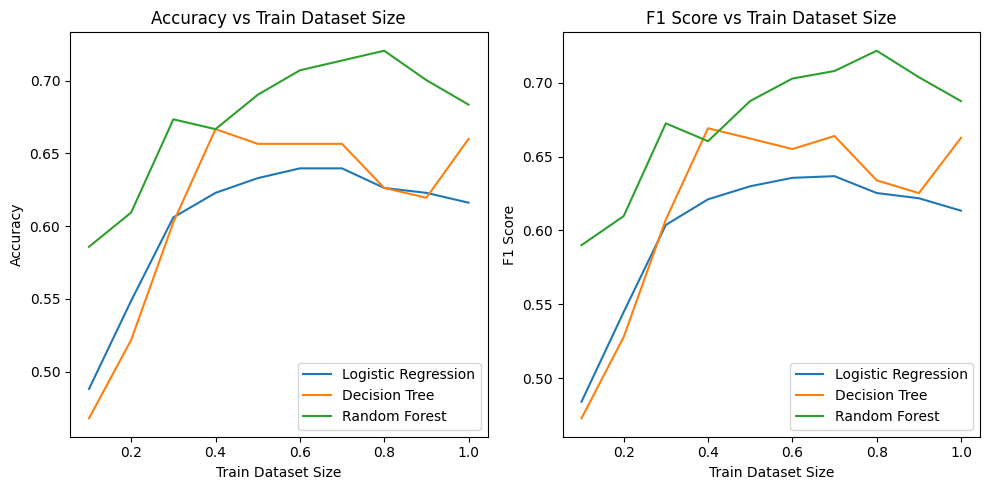

In [18]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize lists to store accuracy and F1 scores
accuracy_scores = {'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': []}
f1_scores = {'Logistic Regression': [], 'Decision Tree': [], 'Random Forest': []}

# Split the training data into 10 equal parts
train_sizes = np.linspace(0.1, 1.0, 10)

for train_size in train_sizes:
    # Determine the number of samples for the current subset
    subset_size = int(len(X_train) * train_size)
    X_subset = X_train[:subset_size]
    y_subset = y_train[:subset_size]
    
    # Train Logistic Regression
    lr = LogisticRegression(**best_params_log_reg, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
    lr.fit(X_subset, y_subset)
    lr_pred = lr.predict(X_test)
    accuracy_scores['Logistic Regression'].append(accuracy_score(y_test, lr_pred))
    f1_scores['Logistic Regression'].append(f1_score(y_test, lr_pred, average='macro'))
    
    # Train Decision Tree
    dt = DecisionTreeClassifier(**best_param_dec_tree,random_state=42)
    dt.fit(X_subset, y_subset)
    dt_pred = dt.predict(X_test)
    accuracy_scores['Decision Tree'].append(accuracy_score(y_test, dt_pred))
    f1_scores['Decision Tree'].append(f1_score(y_test, dt_pred, average='macro'))
    
    # Train Random Forest
    rf = RandomForestClassifier(**best_params_rf)
    rf.fit(X_subset, y_subset)
    rf_pred = rf.predict(X_test)
    accuracy_scores['Random Forest'].append(accuracy_score(y_test, rf_pred))
    f1_scores['Random Forest'].append(f1_score(y_test, rf_pred, average='macro'))

# Plot accuracy scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
for model, scores in accuracy_scores.items():
    plt.plot(train_sizes, scores, label=model)
plt.xlabel('Train Dataset Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Train Dataset Size')
plt.legend()

# Plot F1 scores
plt.subplot(1, 2, 2)
for model, scores in f1_scores.items():
    plt.plot(train_sizes, scores, label=model)
plt.xlabel('Train Dataset Size')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Train Dataset Size')
plt.legend()

plt.tight_layout()
plt.show()



# как и ожидалось при увеличении размера обучающей выборки точность растет
# но также можно наблюдать локальные минимуиы на некоторых размерах выборки.
# RandomForest менее критичен к размеру обучающей выборки
